# Assignment Summary Report:

The dataset containing salary information is relatively large, consisting of 13 columns and 148654 rows. 
The mean salary is $74,768.32, with the highest salary reaching $567,595.43. The most frequently occurring job title is “Transit Operator”. The salaries appear to be
primarily influenced by the BasePay and Benefits that employees receive.

### Libraries and main functions:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def checkNull(DataFrame):
    for col in DataFrame.columns:
        if DataFrame[col].isnull().any():
            print(col, ": has null values")
        else:
            print(col, ": doesn't have null values")
    print("\n")


def dataFrameInfo(DataFrame):
    columnsCount = DataFrame.shape[1]
    rowsCount = DataFrame.shape[0]
    columnsDataType = DataFrame.dtypes

    print("Number of Columns = ", columnsCount)
    print("Number of Rows = ", rowsCount)
    print("Data type of each column: ", "\n", columnsDataType, "\n")


def dataFrameStatistics(DataFrame, Column):
    salaryMean = np.mean(DataFrame[f'{Column}'])
    salaryMedian = np.median(DataFrame[f'{Column}'])
    salaryMode = DataFrame[f'{Column}'].mode()[0]
    salaryMinimum = DataFrame[f'{Column}'].min()
    salaryMaximum = DataFrame[f'{Column}'].max()
    salarySD = DataFrame[f'{Column}'].std()
    salaryRange = salaryMaximum - salaryMinimum
    
    print("Mean of Salaries: ", salaryMean, "\n")
    print("Median of Salaries: ", salaryMedian, "\n")
    print("Mode of Salaries: ", salaryMode, "\n")
    print("Lowest Salary: ", salaryMinimum, "\n")
    print("Highest Salary: ", salaryMaximum, "\n")
    print("Salary Range: ", salaryRange, "\n")
    print("Standard Deviation: ", salarySD, "\n")


# Loading the dataset 
df = pd.read_csv(r"C:\\Users\\Mo\\Desktop\\Salaries.csv")



# 1. Basic Data Exploration:

In [3]:
dataFrameInfo(df)
checkNull(df)

Number of Columns =  13
Number of Rows =  148654
Data type of each column:  
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object 

Id : doesn't have null values
EmployeeName : doesn't have null values
JobTitle : doesn't have null values
BasePay : has null values
OvertimePay : has null values
OtherPay : has null values
Benefits : has null values
TotalPay : doesn't have null values
TotalPayBenefits : doesn't have null values
Year : doesn't have null values
Notes : has null values
Agency : doesn't have null values
Status : has null values




# 2. Descriptive Statistics:

In [4]:
dataFrameStatistics(df, "TotalPay")

Mean of Salaries:  74768.32197169267 

Median of Salaries:  71426.60999999999 

Mode of Salaries:  0.0 

Lowest Salary:  -618.13 

Highest Salary:  567595.43 

Salary Range:  568213.56 

Standard Deviation:  50517.005273949944 



# 3. Data Cleaning:

In [5]:
"""3.1. since Notes and Status do not have any value (all are null), we can drop these two columns"""

cleanedData = df.drop(['Notes', 'Status'], axis=1)

"""3.2. BasePay is a critical part when it comes to salaries. Also, the data set does not have enough information (yeas of experience, departments..etc) to help us decide
how to deal with its null values. Moreover, only 609 rows out of more than 140k rows are null. Thus, we can delete them."""

cleanedData = cleanedData.dropna(subset=['BasePay'], how='all')

"""3.3. *Benefits* column is not a critical part as it is an additional compensation givin to employees aside from their salaries. Therefore, we can use the mean of benefits
columns to replace the null values"""
cleanedData['Benefits'] = cleanedData['Benefits'].fillna(cleanedData['Benefits'].mean())

print(cleanedData.isnull().sum())



Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# 4. Basic data visualization:

Note1: the task says "use pie charts to represent the proportion of employees in different departments" but the data doesn't include emploees departments. Therefore, I used jobtitle column insted.

Note2: I have applied a filter to the data of Pie chart beacuse there are too many jobtitles included in the data. That will need a very large screen to be able to read the chart properly. The filter can be adjusted by changing the value "500" in the code. 

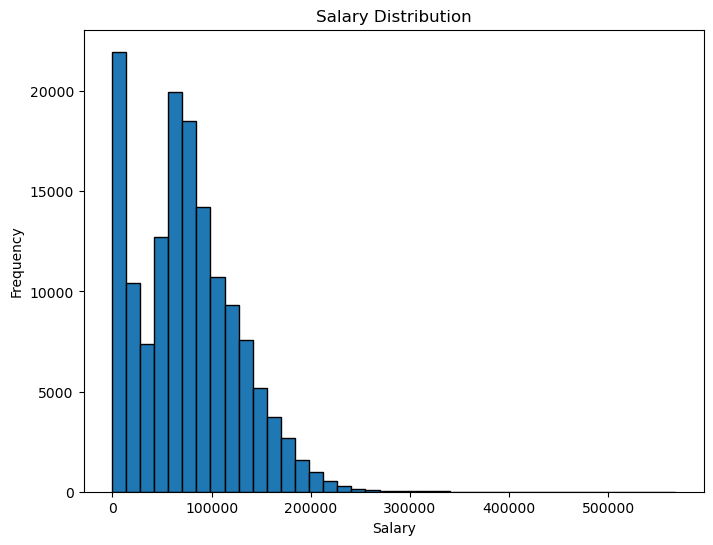

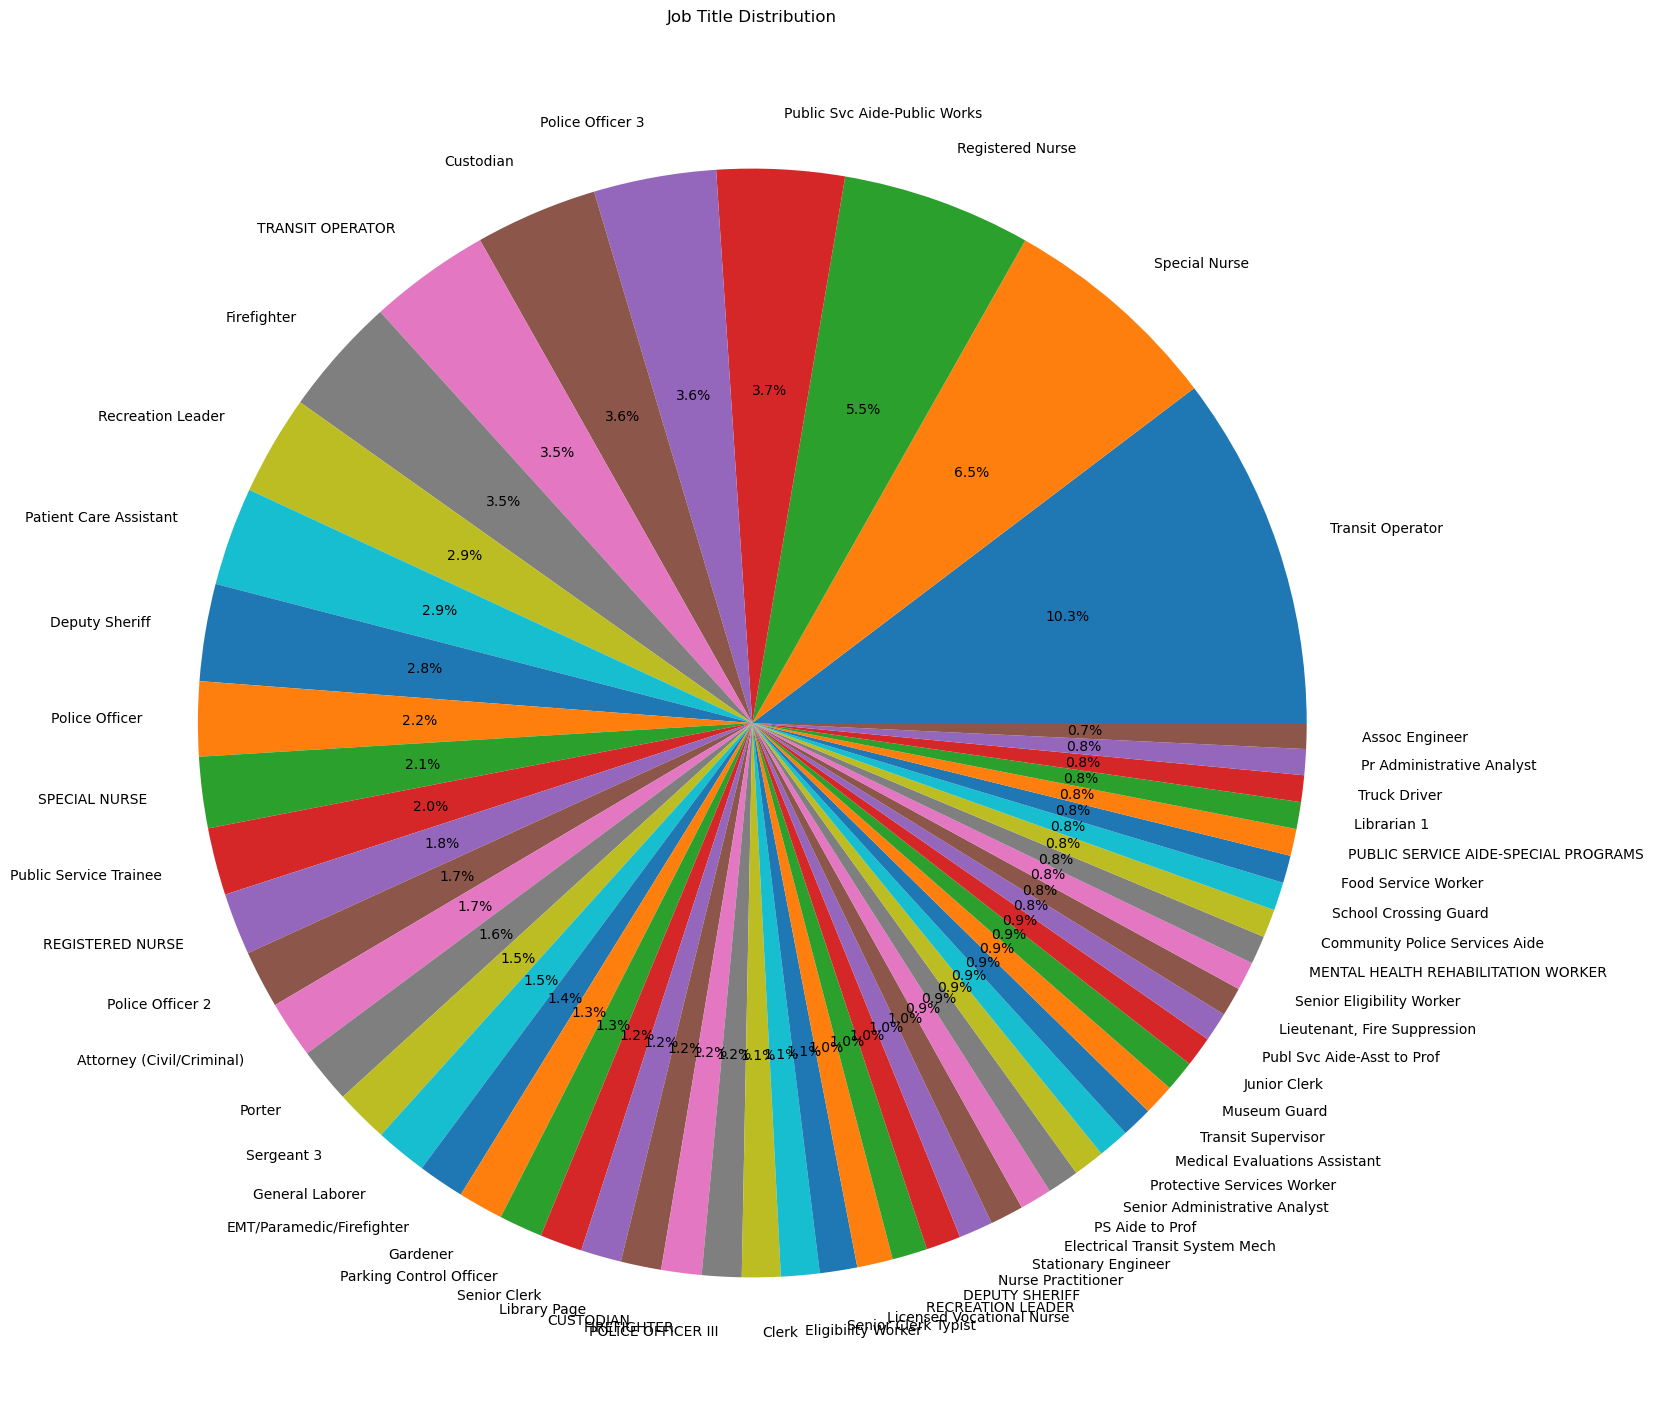

In [10]:
#4.1. Creating a histogram
plt.figure(figsize=(8, 6))
histogram1 = plt.hist(cleanedData['TotalPay'], bins=40, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


#4.2. Creating pie chart
jobtitle_counts = cleanedData['JobTitle'].value_counts()
jobtitle_counts_filterd = jobtitle_counts[jobtitle_counts > 500]
plt.figure(figsize=(20, 18))
plt.pie(jobtitle_counts_filterd, labels = jobtitle_counts_filterd.index, autopct='%1.1f%%')
plt.title('Job Title Distribution')
plt.show()



# 5. Grouped Analysis:

In [7]:
avgSalaries = cleanedData.sort_values(['Year', 'JobTitle'])
print(avgSalaries.drop(['Id', 'EmployeeName', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits', 'Agency'], axis=1))

grouped = cleanedData.groupby(['Year','JobTitle'])['TotalPay']
print(grouped.agg(['mean', 'median', 'std', 'min', 'max']))

                     JobTitle  TotalPay  Year
20765           ACCOUNT CLERK  60838.20  2011
20867           ACCOUNT CLERK  60530.87  2011
21638           ACCOUNT CLERK  58527.20  2011
22972           ACCOUNT CLERK  54674.59  2011
24132           ACCOUNT CLERK  51792.25  2011
...                       ...       ...   ...
141976  X-Ray Laboratory Aide  19031.51  2014
143293  X-Ray Laboratory Aide  12765.54  2014
143520  X-Ray Laboratory Aide  11754.94  2014
143631  X-Ray Laboratory Aide  11341.85  2014
138458     Youth Comm Advisor  36465.91  2014

[148045 rows x 3 columns]
                                              mean      median           std  \
Year JobTitle                                                                  
2011 ACCOUNT CLERK                    44035.664337   49777.820  13170.742908   
     ACCOUNTANT                       47429.268000   60076.240  27137.331315   
     ACCOUNTANT INTERN                29031.742917   17658.505  20711.322649   
     ACUPUNCTURIST   

# 6. Simple Correlation Analysis:

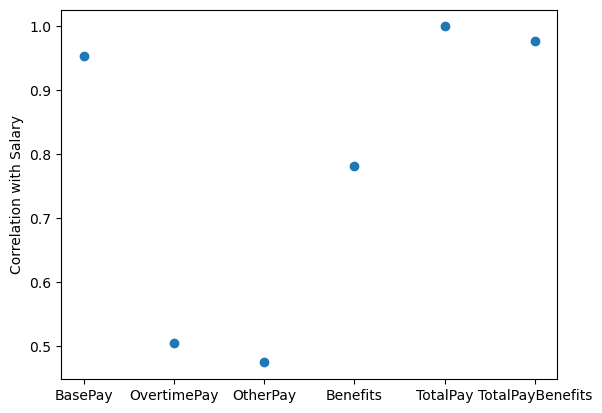

                  TotalPay
BasePay           0.954494
OvertimePay       0.504634
OtherPay          0.474024
Benefits          0.781070
TotalPay          1.000000
TotalPayBenefits  0.977153


In [8]:
correlationDF = cleanedData.drop(['Id', 'JobTitle', 'EmployeeName', 'Year', 'Agency'], axis=1)
NewCDF = correlationDF.corr().drop(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits'], axis = 1)
plt.scatter(NewCDF.index, NewCDF['TotalPay'])
plt.ylabel('Correlation with Salary')
plt.show()
print(NewCDF)

## Message from me:

Thank you very much for giving us the opportunity to be part of your team as trainees to improve our skills.

I Can't wait to study with you!

Mohamad Alnajjar ☕🤖